In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr

import requests_cache
session = requests_cache.CachedSession(cache_name='stocks-cache', backend='sqlite')

ts = pdr.DataReader(
    'FXRU',
    start='2014-01-01',
    end='2021-03-01',
    data_source='moex',
    session=session
)
ts = ts[ts.BOARDID == 'TQTF'].CLOSE.fillna(method='backfill')

usd = pdr.DataReader(
    'RUB=X',
    start='2014-01-01',
    end='2021-03-01',
    data_source='yahoo',
    session=session
).Close.fillna(method='backfill')

usd[usd < 1] = np.nan

pdf = pd.DataFrame({'usd': usd, 'rub': ts}, index=ts.index)

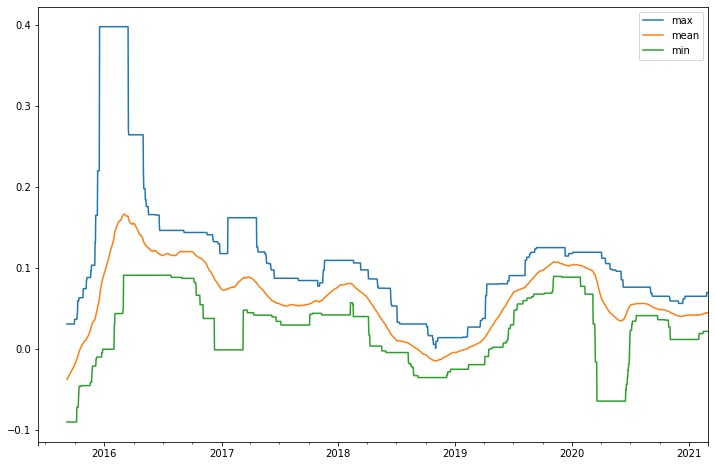

In [15]:
pusd = pdf.rub/pdf.usd
idx = pd.date_range(ts.index.min(), ts.index.max())
tsf = pd.Series(index=idx)
tsf.loc[pusd.index] = pusd
tsf = tsf.fillna(method='backfill')
tsf[tsf > 20] = tsf[tsf > 20]/10

tsf.pct_change(365)[365:].rolling(90).agg(['max', 'mean', 'min']).plot(figsize=(12,8));